In [99]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
%matplotlib inline

/home/yangz2/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  


In [100]:
import gym
import d4rl

In [101]:
from d4rl.infos import REF_MAX_SCORE, REF_MIN_SCORE

In [119]:
env_id = 'walker2d-medium-expert-v0'

In [120]:
env_id_to_pub_score = {
    'hopper-medium-v0': 58.0,
    'hopper-medium-replay-v0': 48.0,
    'hopper-medium-expert-v0': 111.0,
    'walker2d-medium-v0': 79.2,
    'walker2d-medium-replay-v0': 26.7,
    'walker2d-medium-expert-v0': 98.7
}

In [121]:
MAX, MIN = REF_MAX_SCORE[env_id], REF_MIN_SCORE[env_id]

In [122]:
MAX, MIN

(4592.3, 1.629008)

In [123]:
def normalize(scores):
    return (scores - MIN) / (MAX - MIN) * 100

In [124]:
def exp_smoother(scores, alpha=0.90):
    smoothed_scores = []
    curr = scores[0]
    for i, score in enumerate(scores):
        smoothed_scores.append(curr)
        curr = alpha * curr + (1 - alpha) * score
    return np.array(smoothed_scores)

In [125]:
BASE_LOG_DIR = '../results'
def get_returns(env_id, algo_name, seed):
    csv_path = os.path.join(BASE_LOG_DIR, algo_name, env_id, str(seed), 'progress.csv')
    return normalize(exp_smoother(list(map(float, pd.read_csv(csv_path)['evaluation/Average Returns'].to_numpy()))))

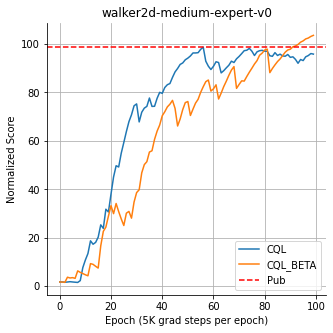

In [126]:
plt.figure(figsize=(5, 5))

plt.plot(get_returns(env_id, 'CQL', 1), label='CQL')
plt.plot(get_returns(env_id, 'CQL_BETA', 1), label='CQL_BETA')

plt.axhline(env_id_to_pub_score[env_id], label='Pub', color='red', linestyle='--')

plt.legend()
plt.xlabel('Epoch (5K grad steps per epoch)')
plt.ylabel('Normalized Score')
plt.title(env_id)
plt.grid()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()